In [164]:
import os
import re
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")

## Parsing Summary files of GPT4o experiments to consolidate metrics

In [10]:
headers = [
    "benchmark_name",
    "workflow",
    "model",
    "num_questions",
    "num_correct",
    "accuracy",
    "conf_1_accuracy",
    "conf_2_accuracy",
    "conf_3_accuracy",
    "conf_4_accuracy",
    "conf_5_accuracy"
]

# Prepare CSV rows
rows = []

In [ ]:
##ZEROSHOT PARSING
folder_path = "../../out/gpt4o/zeroshot" 
for filename in os.listdir(folder_path):
    if ("SUMMARY_") in filename and filename.endswith(".txt"):
        filepath = os.path.join(folder_path, filename)
        with open(filepath, 'r') as file:
            content = file.read()

            # Extract benchmark name
            benchmark_name = filename.replace("SUMMARY_", "").replace(".txt", "")

            # Extract main stats
            num_questions = int(re.search(r"Total questions:\s*(\d+)", content).group(1))
            num_correct = int(re.search(r"Correct:\s*(\d+)", content).group(1))
            accuracy = float(re.search(r"Overall Accuracy:\s*([\d.]+)%", content).group(1))

            # Initialize confidence level accuracy
            conf_accuracy = {str(i): '' for i in range(1, 6)}

            # Find all confidence level accuracies
            for match in re.finditer(r"(\d):\s*([\d.]+)%", content):
                level, value = match.groups()
                conf_accuracy[level] = float(value)

            row = [
                benchmark_name,
                "zeroshot",
                "gpt4o",
                num_questions,
                num_correct,
                accuracy,
                conf_accuracy['1'],
                conf_accuracy['2'],
                conf_accuracy['3'],  # May remain blank if missing
                conf_accuracy['4'],
                conf_accuracy['5']
            ]
            rows.append(row)

# Write to CSV
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(headers)
    writer.writerows(rows)

print(f"Summary stats written to {output_csv}")


Summary stats written to summary_stats_mas.csv


In [ ]:
##EVALOPTIM PARSING
folder_path = "../../out/gpt4o/evaloptim" 
for filename in os.listdir(folder_path):
    if filename.endswith("SUMMARY.txt"):
        filepath = os.path.join(folder_path, filename)
        with open(filepath, 'r') as file:
            content = file.read()

            # Extract benchmark name
            benchmark_name = 'evaloptim_gpt4o_' + filename.replace("_SUMMARY.txt", "")

            # Extract main stats
            num_questions = int(re.search(r"Total questions:\s*(\d+)", content).group(1))
            num_correct = int(re.search(r"Correct:\s*(\d+)", content).group(1))
            accuracy = float(re.search(r"Overall Accuracy:\s*([\d.]+)%", content).group(1))

            # Initialize confidence level accuracy
            conf_accuracy = {str(i): '' for i in range(1, 6)}

            # Find all confidence level accuracies
            for match in re.finditer(r"(\d):\s*([\d.]+)%", content):
                level, value = match.groups()
                conf_accuracy[level] = float(value)

            row = [
                benchmark_name,
                'evaloptim',
                'gpt4o',
                num_questions,
                num_correct,
                accuracy,
                conf_accuracy['1'],
                conf_accuracy['2'],
                conf_accuracy['3'],  # May remain blank if missing
                conf_accuracy['4'],
                conf_accuracy['5']
            ]
            rows.append(row)

In [ ]:
##MAS PARSING
folder_path = "../../out/gpt4o/mas" 
for filename in os.listdir(folder_path):
    if filename.endswith("SUMMARY.txt"):
        filepath = os.path.join(folder_path, filename)
        with open(filepath, 'r') as file:
            content = file.read()

            # Extract benchmark name
            benchmark_name = filename.replace("_SUMMARY.txt", "")

            # Extract main stats
            num_questions = int(re.search(r"Total questions:\s*(\d+)", content).group(1))
            num_correct = int(re.search(r"Correct:\s*(\d+)", content).group(1))
            accuracy = float(re.search(r"Overall Accuracy:\s*([\d.]+)%", content).group(1))

            # Initialize confidence level accuracy
            conf_accuracy = {str(i): '' for i in range(1, 6)}

            # Find all confidence level accuracies
            for match in re.finditer(r"(\d):\s*([\d.]+)%", content):
                level, value = match.groups()
                conf_accuracy[level] = float(value)

            row = [
                benchmark_name,
                'mas',
                'gpt4o',
                'ethics',
                num_questions,
                num_correct,
                accuracy,
                conf_accuracy['1'],
                conf_accuracy['2'],
                conf_accuracy['3'],  # May remain blank if missing
                conf_accuracy['4'],
                conf_accuracy['5']
            ]
            rows.append(row)

In [14]:
output_csv = "summary_stats_gpt4o.csv"
# Write to CSV
with open(output_csv, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(headers)
    writer.writerows(rows)

print(f"Summary stats written to {output_csv}")

Summary stats written to summary_stats_gpt4o.csv


## Metrics Visualization

In [148]:
metrics_df = pd.read_csv('../../out/gpt4o/summary_stats_gpt4o.csv')

In [168]:
metrics_df

,Benchmark_Name,Workflow,Model,Domain,Num_Questions,Num_Correct,Accuracy,Conf_1_Accuracy,Conf_2_Accuracy,Conf_3_Accuracy,Conf_4_Accuracy,conf_5_accuracy,Conf_1_Count,Conf_2_Count,Conf_3_Count,Conf_4_Count,Conf_5_Count
0,BBQ,zeroshot,gpt4o,Safety/Regulation,871,757,86.91,89.47,87.69,85.88,74.34,91.74,133.0,65.0,170.0,152,351
1,BBQ,mas,gpt4o,Safety/Regulation,871,681,78.19,45.10,47.06,42.31,57.81,86.03,51.0,17.0,52.0,64,687
2,BBQ,evaloptim,gpt4o,Safety/Regulation,871,803,92.19,97.50,80.77,89.33,82.68,95.97,120.0,52.0,150.0,127,422
3,CaseHOLD,zeroshot,gpt4o,Safety/Regulation,403,284,70.47,NaN,0.00,14.29,59.59,80.58,NaN,1.0,14.0,146,242
4,CaseHOLD,mas,gpt4o,Safety/Regulation,403,274,67.99,33.33,40.00,42.31,47.62,73.39,3.0,5.0,26.0,42,327
5,CaseHOLD,evaloptim,gpt4o,Safety/Regulation,402,0,0.00,0.00,0.00,0.00,0.00,0.00,2.0,6.0,8.0,98,288
6,MedBullets,zeroshot,gpt4o,Metacognition,307,204,66.45,NaN,NaN,0.00,37.93,69.68,NaN,NaN,1.0,29,277
7,MedBullets,mas,gpt4o,Metacognition,308,213,69.16,NaN,0.00,44.44,38.71,74.06,NaN,2.0,9.0,31,266
8,MedBullets,evaloptim,gpt4o,Metacognition,308,205,66.56,0.00,NaN,75.00,35.71,70.07,2.0,NaN,4.0,28,274
9,MedCalc,zeroshot,gpt4o,Metacognition,419,122,29.12,NaN,NaN,33.33,19.15,30.35,NaN,NaN,3.0,47,369


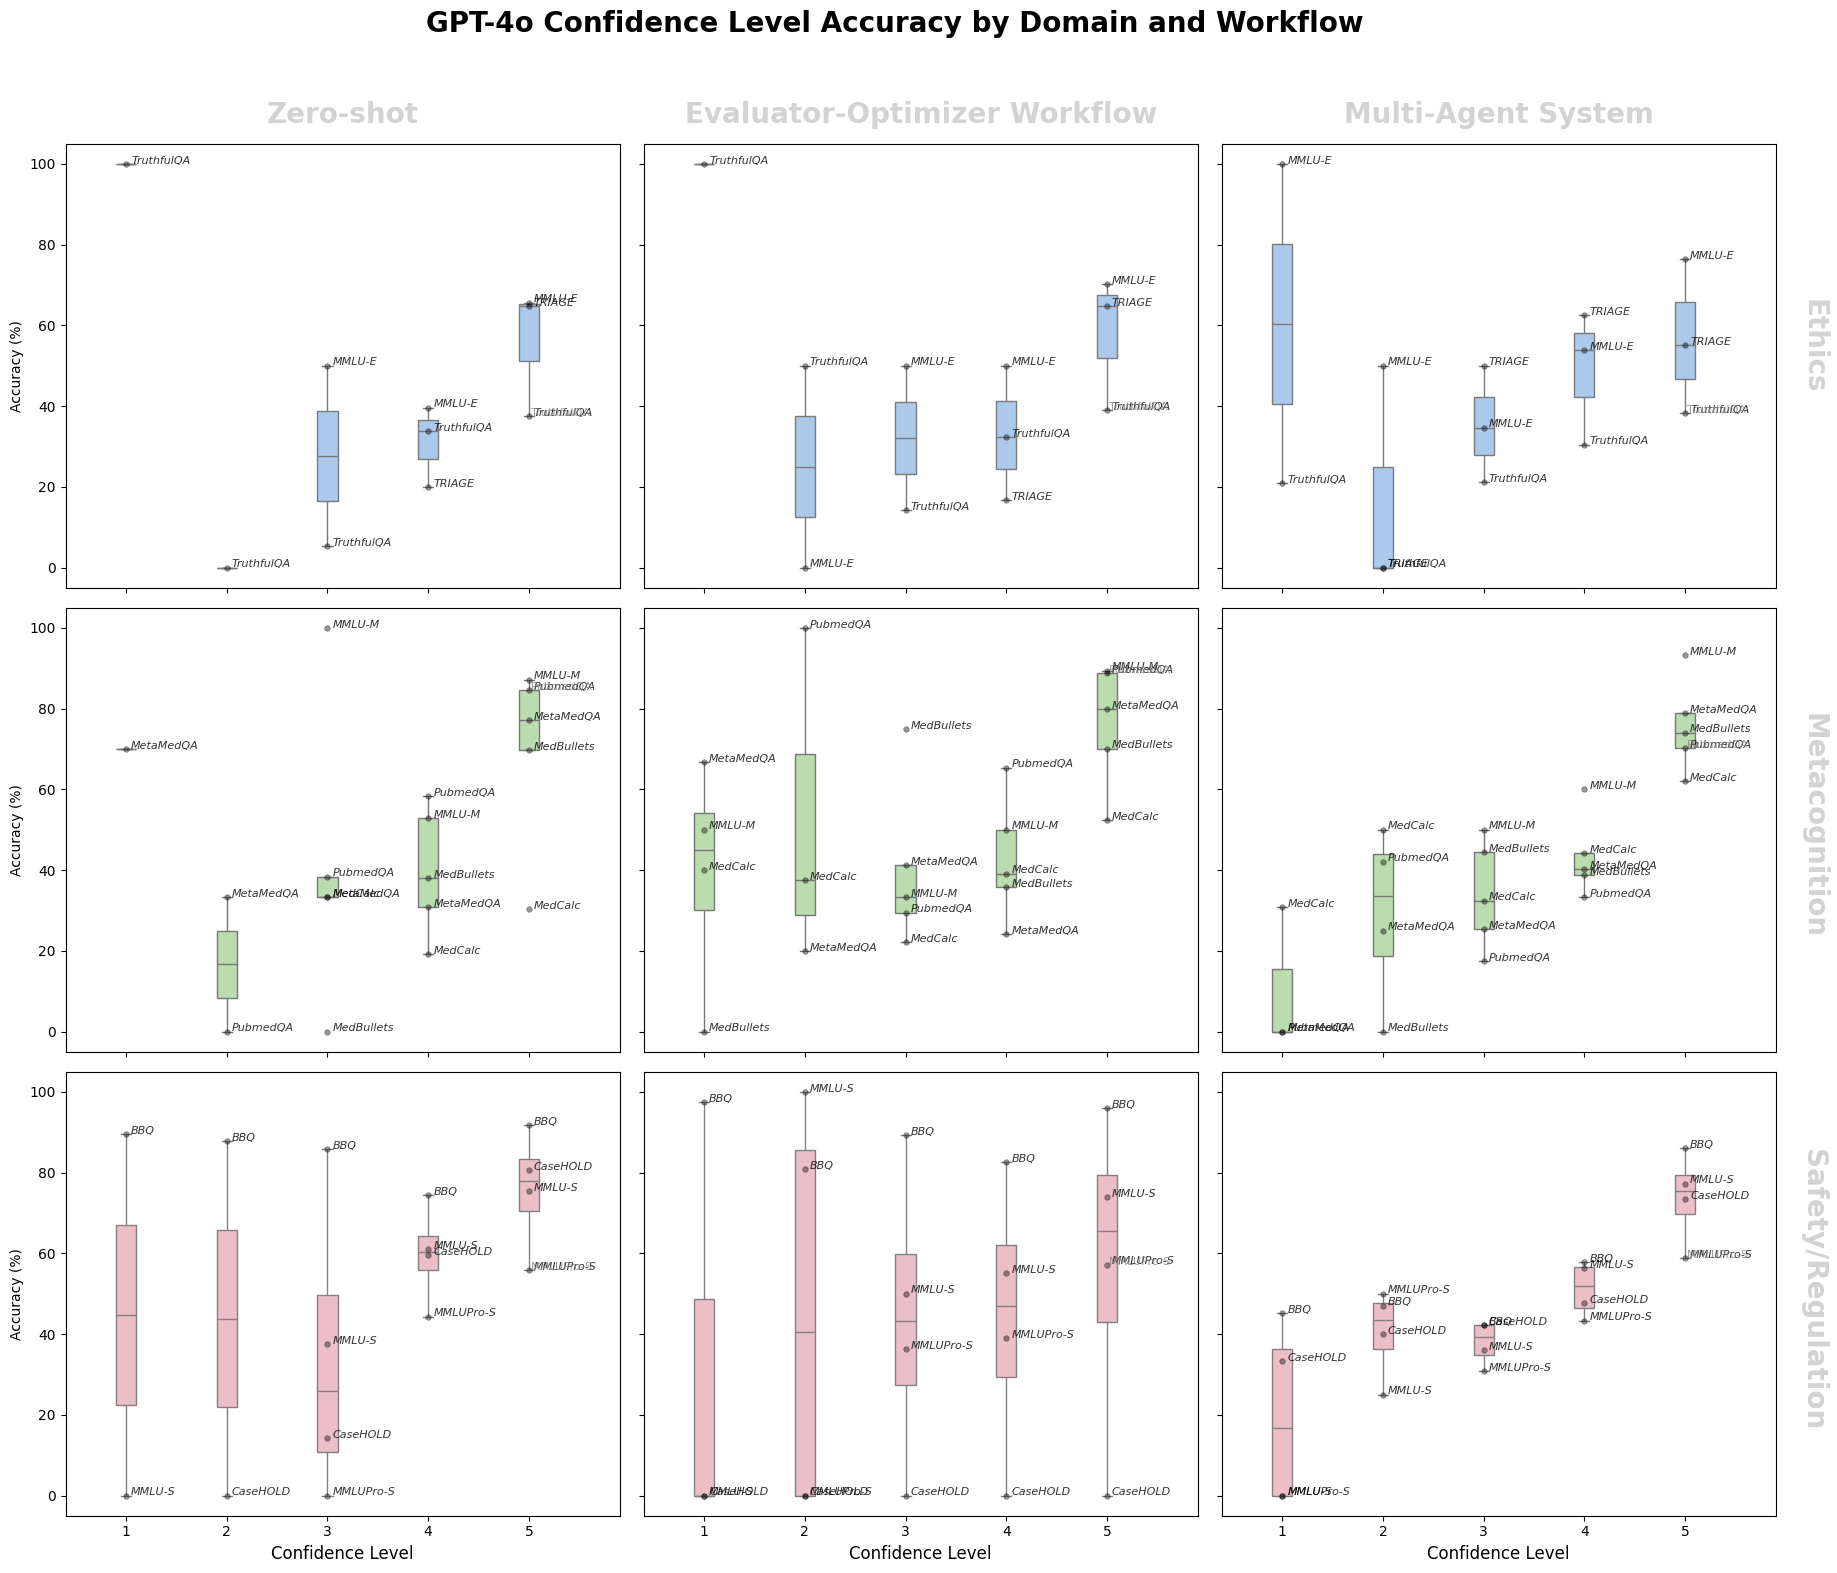

In [163]:
df_scores = metrics_df[['Benchmark_Name', 'Domain', 'Workflow', 'Conf_1_Accuracy', 'Conf_2_Accuracy', 'Conf_3_Accuracy', 'Conf_4_Accuracy', 'conf_5_accuracy']].rename(columns={
    'Conf_1_Accuracy': '1',
    'Conf_2_Accuracy': '2',
    'Conf_3_Accuracy': '3',
    'Conf_4_Accuracy': '4',
    'conf_5_accuracy': '5'
    }
)

domains = ['Ethics', 'Metacognition', 'Safety/Regulation']
workflows = ['zeroshot', 'evaloptim', 'mas']
title_map = {
    'zeroshot': 'Zero-shot',
    'evaloptim': 'Evaluator-Optimizer Workflow',
    'mas': 'Multi-Agent System'}
pos_map = {
    0 : 0.77,
    1 : 0.47,
    2 : 0.18,
}

titles = []
dfs = []
for d in domains:
    for w in workflows:
        dfs.append(df_scores[(df_scores.Domain == d) & (df_scores.Workflow == w)])
        titles.append(f"{d} - {w}")

custom_palettes = [
    ['#A1C9F4'] * 5, ['#A1C9F4'] * 5, ['#A1C9F4'] * 5,
    ['#B6E3A8'] * 5, ['#B6E3A8'] * 5, ['#B6E3A8'] * 5,  
    ['#F4B6C2'] * 5, ['#F4B6C2'] * 5, ['#F4B6C2'] * 5,  
]

flierprops = dict(marker='o', markerfacecolor='black', markersize=8, linestyle='none', markeredgecolor='black')

# Create 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(18, 16), sharey=True, sharex=True, constrained_layout=False)

# Plotting loop
for i, ax in enumerate(axes.flat):
    if dfs[i].empty:
        ax.set_visible(False)
        continue

    df_values = dfs[i][['Benchmark_Name','1', '2', '3', '4', '5']].copy()
    df_melted = df_values.melt(id_vars='Benchmark_Name', var_name='Confidence Level', value_name='Accuracy (%)')
    benchmark_list = df_values.Benchmark_Name.tolist()


    sns.boxplot(
        x='Confidence Level',
        y='Accuracy (%)',
        data=df_melted,
        palette=custom_palettes[i],
        ax=ax,
        showfliers=False,
        width=0.2,
        #flierprops=flierprops
    )

    # Overlay actual data points (less prominent)
    sns.stripplot(
        x='Confidence Level',
        y='Accuracy (%)',
        data=df_melted,
        color='black',
        alpha=0.4,
        jitter=False,
        size=4,
        linewidth=0.5,
        ax=ax
    )

    # Annotate each point with its Benchmark
    for line in range(df_melted.shape[0]):
        # Get x and y coordinate
        x_val = df_melted['Confidence Level'].iloc[line]
        y_val = df_melted['Accuracy (%)'].iloc[line]
        label = df_melted['Benchmark_Name'].iloc[line]

        # Find corresponding x-position (category index)
        x_pos = list(df_melted['Confidence Level'].unique()).index(x_val)

        # Jitter x position slightly to match stripplot jitter
        ax.text(x_pos + 0.05, y_val+0.05, label, fontsize=8, color='black', fontstyle='italic', alpha=0.8)

    if i < 3:
        ax.set_title(title_map[titles[i].split('-')[-1].replace(' ','')], fontsize=20, fontweight='bold', c='lightgray', pad=15)
    ax.set_xlabel('Confidence Level', fontsize=12)

    ax.set_xlim(-0.6, len(df_melted['Confidence Level'].unique()) - 0.1)

    # And during annotation
    ax.text(x_pos + 0.02, y_val, label, fontsize=8, color='gray', alpha=0.8, clip_on=True)  

for row_idx, label in enumerate(domains):
    fig.text(
        1.01,                                # X (near the right edge)
        pos_map[row_idx],               # Y = mid of each row
        label,
        va='center',
        ha='center',
        fontsize=20,
        fontweight='bold',
        rotation=270,
        c='lightgray'  # -90 degrees
    )

plt.suptitle('GPT-4o Confidence Level Accuracy by Domain and Workflow\n\n', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

In [192]:
metrics_df.sort_values(by=['Domain', 'Workflow', 'Benchmark_Name'], inplace=True)

In [193]:
metrics_df 

,Benchmark_Name,Workflow,Model,Domain,Num_Questions,Num_Correct,Accuracy,Conf_1_Accuracy,Conf_2_Accuracy,Conf_3_Accuracy,Conf_4_Accuracy,conf_5_accuracy,Conf_1_Count,Conf_2_Count,Conf_3_Count,Conf_4_Count,Conf_5_Count
16,MMLU-E,evaloptim,gpt4o,Ethics,895,588,65.70,NaN,0.00,50.00,50.00,70.20,NaN,1.0,2.0,194,698
31,TRIAGE,evaloptim,gpt4o,Ethics,86,47,54.65,NaN,NaN,NaN,16.67,64.71,NaN,NaN,NaN,18,68
35,TruthfulQA,evaloptim,gpt4o,Ethics,728,274,37.64,100.00,50.00,14.29,32.31,38.95,1.0,2.0,7.0,130,588
17,MMLU-E,mas,gpt4o,Ethics,895,615,68.72,100.00,50.00,34.67,53.94,76.38,1.0,2.0,75.0,165,652
32,TRIAGE,mas,gpt4o,Ethics,86,47,54.65,NaN,0.00,50.00,62.50,55.07,NaN,1.0,8.0,8,69
34,TruthfulQA,mas,gpt4o,Ethics,723,251,34.72,20.83,0.00,21.21,30.48,38.26,48.0,9.0,33.0,105,528
15,MMLU-E,zeroshot,gpt4o,Ethics,895,547,61.12,NaN,NaN,50.00,39.61,65.63,NaN,NaN,2.0,154,739
30,TRIAGE,zeroshot,gpt4o,Ethics,86,49,56.98,NaN,NaN,NaN,20.00,64.79,NaN,NaN,NaN,15,71
33,TruthfulQA,zeroshot,gpt4o,Ethics,784,282,35.97,100.00,0.00,5.26,33.73,37.61,1.0,2.0,19.0,169,593
20,MMLU-M,evaloptim,gpt4o,Metacognition,395,338,85.57,50.00,NaN,33.33,50.00,89.39,2.0,NaN,3.0,32,358


In [214]:
workflows

array(['evaloptim', 'mas', 'zeroshot'], dtype=object)

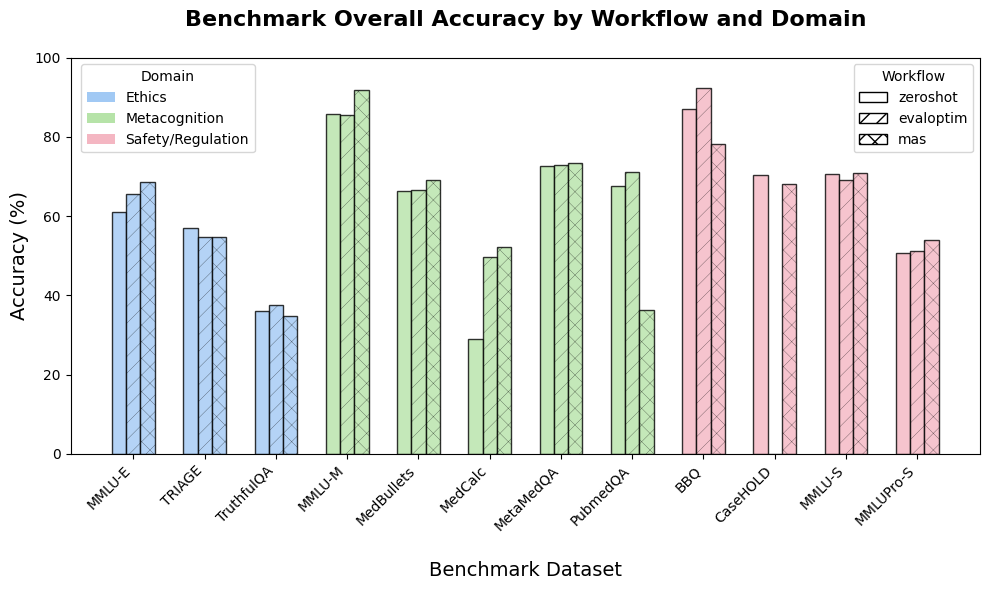

In [227]:
# Unique values
benchmarks = metrics_df['Benchmark_Name'].unique()
workflows = ['zeroshot', 'evaloptim', 'mas']
categories = metrics_df['Domain'].unique()

# Color map by category
category_colors = {
    'Ethics': '#A1C9F4',
    'Metacognition': '#B6E3A8',
    'Safety/Regulation': '#F4B6C2'
}

# Hatching patterns by workflow
workflow_hatches = {
    'zeroshot': '',
    'evaloptim': '//',
    'mas': 'xx'
}

# Bar width
bar_width = 0.2
x = np.arange(len(benchmarks))

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 6))
metrics_df_sorted = metrics_df.sort_values(by=['Domain'])
# Plot bars per workflow
for i, workflow in enumerate(workflows):
    # Offset positions for each bar within a group
    positions = x + (i - 1) * bar_width

    for j, benchmark in enumerate(benchmarks):
        row = metrics_df_sorted[(metrics_df_sorted['Benchmark_Name'] == benchmark) & (metrics_df_sorted['Workflow'] == workflow)].iloc[0]
        acc = row['Accuracy']
        cat = row['Domain']
        color = category_colors[cat]
        hatch = workflow_hatches[workflow]
        
        ax.bar(positions[j], acc, width=bar_width, color=color, hatch=hatch, edgecolor='black', lw=1,hatch_linewidth=0.2, alpha=0.8 )

# Axis and labels
ax.set_xticks(x)
ax.set_xticklabels(benchmarks, rotation=45, ha='right')
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_xlabel('Benchmark Dataset', labelpad=20, fontsize=14)
ax.set_title('Benchmark Overall Accuracy by Workflow and Domain\n', fontsize=16, fontweight='bold')

# Create legends
# Workflow legend (hatches)
from matplotlib.patches import Patch
workflow_patches = [Patch(facecolor='white', edgecolor='black', hatch=workflow_hatches[w], label=w) for w in workflows]
category_patches = [Patch(facecolor=category_colors[c], label=c) for c in categories]

legend1 = ax.legend(
    handles=workflow_patches,
    title='Workflow',
    loc='upper right',
    bbox_to_anchor=(1, 1),
    fontsize=10,
)

legend2 = ax.legend(
    handles=category_patches,
    title='Domain',
    loc='upper right',
    fontsize=10,
    bbox_to_anchor=(0.21, 1)
)
plt.ylim([0,100])
ax.add_artist(legend1)

plt.tight_layout()
plt.show()
